# Importa as bibliotecas 

In [56]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC

In [57]:
risco = pd.read_csv('risco.csv')
risco.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


# Obtendo estatistícas descritivas sobre o conjunto de dados 

In [58]:
risco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
risco.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
# Remove a coluna do id_cliente 
risco = risco.drop('id_cliente', axis=1)
risco.head()

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto


# Visualizando o conjunto de dados

anot_cadastrais       AxesSubplot(0.125,0.536818;0.227941x0.343182)
indice_inad        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
class_renda        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
saldo_contas             AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

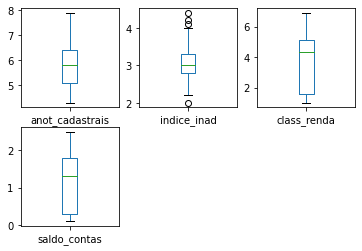

In [40]:
# Cria um gráfico do tipo boxplot
risco.plot(kind='box', subplots=True, layout=(2, 3), sharex=False, sharey=False)

# Treinando a maquina preditiva atravéz do conjunto de dados

In [61]:
#  Seleciona os dados de entrada e Saída
X = risco.iloc[:, :-1]
y = risco.iloc[:, -1]

In [62]:
# Cria a maquina preditiva 
classifier = SVC(kernel='linear',
                 gamma= 1e-5,
                 C = 10,
                 random_state=7)

In [63]:
# Alimenta a maquina preditiva com os dados de treinamento
classifier.fit(X_train, y_train)

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [64]:
# Treina a maquina preditiva
y_pred = classifier.predict(X_test)
print('Valores dpreditos pelo teste:\n', y_pred)
print('Atual valores do teste\n', y_test)

Valores dpreditos pelo teste:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']
Atual valores do teste
 149    Risco_Baixo
84     Risco_Medio
40      Risco_Alto
66     Risco_Medio
106    Risco_Baixo
41      Risco_Alto
52     Risco_Medio
94     Risco_Medio
11      Risco_Alto
51     Risco_Medio
77     Risco_Medio
85     Risco_Medio
32      Risco_Alto
109    Risco_Baixo
28      Risco_Alto
70     Risco_Medio
108    Risco_Baixo
137    Risco_Baixo
46      Risco_Alto
37      Risco_Alto
82     Risco_Medio
120    Risco_Baixo
63     Risco_Medio
119    Risco_Baixo
129    Risco_Baixo
138    Risco_Baixo
97     Risco_Medio
80     Risco

In [65]:
# Obtem informações sobre a acuracia da maquina preditiva
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)*100)
error_df = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

Accuracy: 93.33333333333333


In [66]:
# Obtem informações sobre os parametros da maquina preditiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

# Como observado tinhamos um conjunto de dados com informações sobre o risco para empréstimo de capital, sendo assim construimos uma maquina preditiva capaz de apurar o nivel do risco, estando entre baixo, médio e alto, com uma acuracia de 93%.